# Knee identification code

Load libraries

In [22]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## A) Knee-point identification - Bacon-Watts model

Bacon-Watts model from Bacon, D. & Watts, D.  Estimating the transition between two intersecting straight lines. *Biometrika* **58**, 525–534 (1971)

In [108]:
# Define bacon-watts formula
def bacon_watts_model(x, alpha0, alpha1, alpha2, x1):
    ''' Equation of bw_model'''
    return alpha0 + alpha1*(x - x1) + alpha2*(x - x1)*np.tanh((x - x1) / 1e-8)

def fit_bacon_watts(y, p0):
    ''' Function to fit Bacon-Watts model to identify knee-point in capacity fade data
    
    Args:
    - capacity fade data (list): cycle-to-cycle evolution of Qd capacity
    - p0 (list): initial parameter values for Bacon-Watts model
    
    Returns:
    - popt (int): fitted parameters
    - confint (list): 95% confidence interval for fitted knee-point
    '''         
    
    # Define array of cycles
    x = np.arange(len(y)) + 1
    
    # Fit bacon-watts
    popt, pcov = curve_fit(bacon_watts_model, x, y, p0=p0)
    
    confint = [popt[3] - 1.96 * np.diag(pcov)[3], 
               popt[3] + 1.96 * np.diag(pcov)[3]]
    
    return popt, confint

Fit Bacon-Watts model to A123 dataset, from Severson, K. *et al*. Data-driven prediction of battery cycle life before capacity degradation. *Nature Energy* **4**, 1–9 (2019) [2019] (https://data.matr.io/1/projects/5c48dd2bc625d700019f3204)

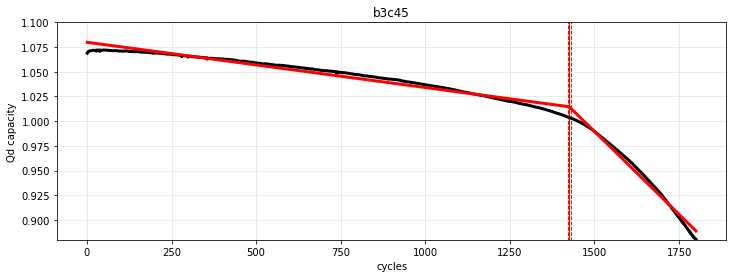

In [141]:
with open('qd_capacity_data.json', 'r') as fp:
    qd_capacity_dict = json.load(fp)

# Fit Bacon-Watts model to sample cell
sample_cell = 'b3c45'
x_data = np.arange(len(qd_capacity_dict[sample_cell]))+1
y_data = qd_capacity_dict[sample_cell]
p0 = [1, -1e-4, -1e-4, len(y_data)*.7]
popt_kpoint, confint = fit_bacon_watts(y_data, p0)

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(x_data, y_data, 'k-', linewidth=3)
plt.plot(x_data, bacon_watts_model(x_data, *popt_kpoint), 'r-', linewidth=3)
plt.vlines(popt_kpoint[3], 0, 2, color='red', linewidth=1)
plt.vlines(confint[0], 0, 2, color='red', linewidth=1, linestyle='--')
plt.vlines(confint[1], 0, 2, color='red', linewidth=1, linestyle='--')
plt.xlabel('cycles')
plt.ylabel('Qd capacity')
plt.grid(alpha=.3)
plt.ylim(.88, 1.1)
plt.title(sample_cell)
plt.show()

## B) Knee-onset identification - Double Bacon-Watts model

In [113]:
def double_bacon_watts_model(x, alpha0, alpha1, alpha2, alpha3, x0, x2):
    return alpha0 + alpha1*(x - x0) + alpha2*(x - x0)*np.tanh((x - x0)/1e-8) + alpha3*(x - x2)*np.tanh((x - x2)/1e-8)

In [118]:
def fit_double_bacon_watts(y, p0):
    ''' Function to fit Bacon-Watts model to identify knee-point in capacity fade data
    
    Args:
    - capacity fade data (list): cycle-to-cycle evolution of Qd capacity
    - p0 (list): initial parameter values for Bacon-Watts model
    
    Returns:
    - popt (int): fitted parameters
    - confint (list): 95% confidence interval for fitted knee-point
    ''' 
    
    # Define array of cycles
    x = np.arange(len(y)) + 1
    
    # Fit bacon-watts
    popt, pcov = curve_fit(double_bacon_watts_model, x, y, p0=p0)
    
    confint = [popt[4] - 1.96 * np.diag(pcov)[4], 
               popt[4] + 1.96 * np.diag(pcov)[4]]
    
    return popt, confint

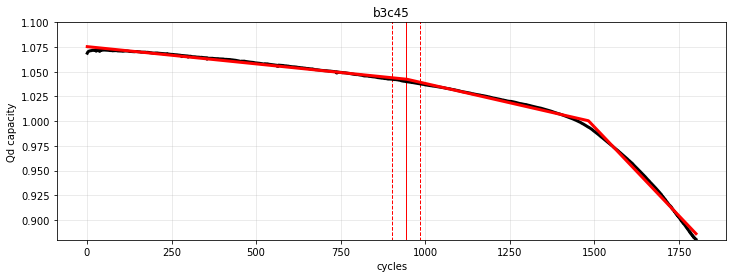

In [142]:
# Fit double Bacon-Watts model to sample cell
sample_cell = 'b3c45'
x_data = np.arange(len(qd_capacity_dict[sample_cell]))+1
y_data = qd_capacity_dict[sample_cell]
p0 = [popt[0], popt[1] + popt[2]/2, popt[2], popt[2]/2, .8*popt[3], 1.1*popt[3]]
popt_konset, confint = fit_double_bacon_watts(y_data, p0)

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(x_data, y_data, 'k-', linewidth=3)
plt.plot(x_data, double_bacon_watts_model(x_data, *popt_konset), 'r-', linewidth=3)
plt.vlines(popt_konset[4], 0, 2, color='red', linewidth=1)
plt.vlines(confint[0], 0, 2, color='red', linewidth=1, linestyle='--')
plt.vlines(confint[1], 0, 2, color='red', linewidth=1, linestyle='--')
plt.xlabel('cycles')
plt.ylabel('Qd capacity')
plt.grid(alpha=.3)
plt.ylim(.88, 1.1)
plt.title(sample_cell)
plt.show()